In [1]:
import numpy as np
import matplotlib.pyplot as plt

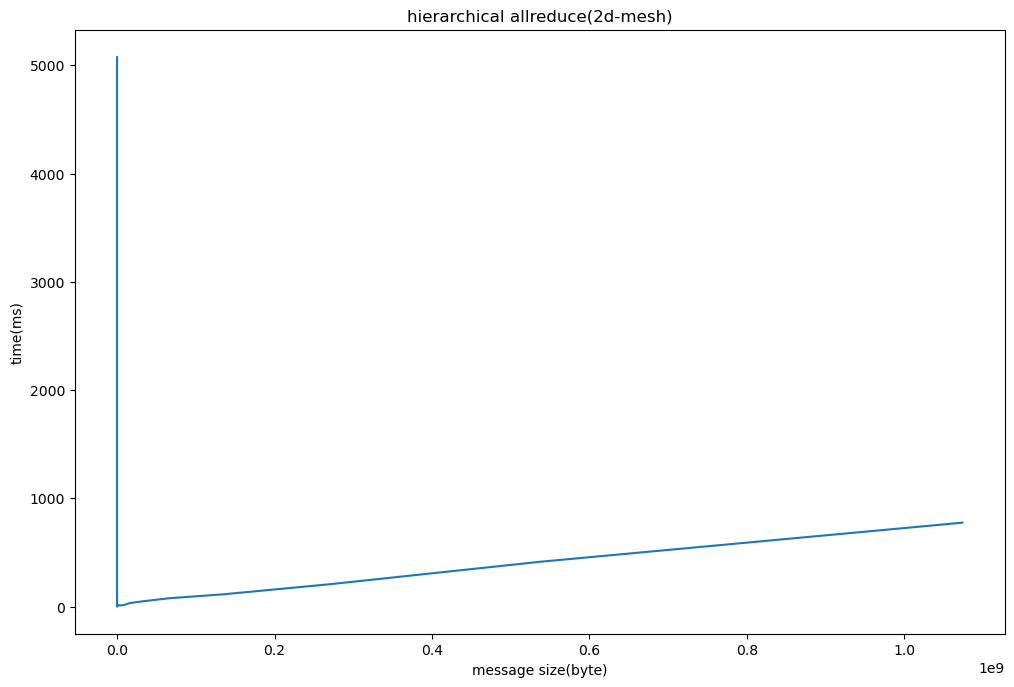

In [13]:
def read_hvd(filename, arrlen=29):
    
    with open(filename, 'r') as f:
        content = f.read()

    arr = content.split(",")
    arr = arr[:-1]
    
    resultlen = len(arr)/arrlen
    
    result = {}
    y = []
    for i in range(arrlen):
        result[i] = 0

    for i in range(len(arr)):
        j = i % arrlen
        result[j] += float(arr[i])

    for i in range(arrlen):
        result[i] /= resultlen
        y.append(result[i])
    
    # 32-bit floating number is 4 byte
    x = [2**i *4 for i in range(arrlen)]
    
    return x, y

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
x, y = read_hvd("./data/horovod-results/15gpu/10g-15gpu-2dmesh.txt")
plt.plot(x,y)
plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
# nccl_reducescatter+mpi_allreduce+mpi_allgather
plt.title('hierarchical allreduce(2d-mesh)')
plt.show()

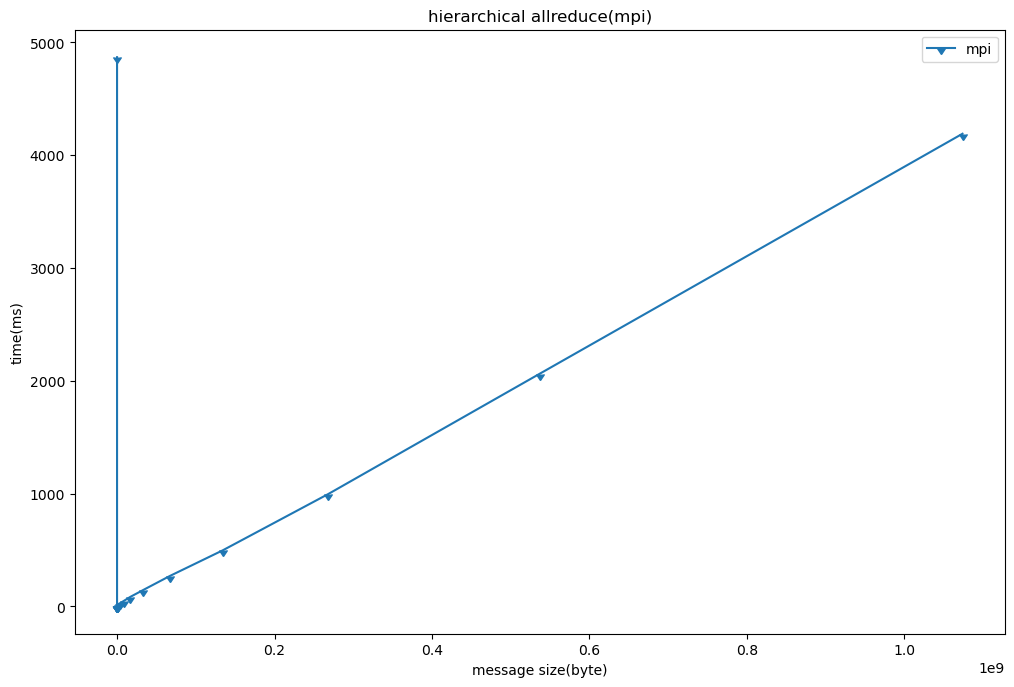

In [47]:

x1, y1 = read_hvd("./data/horovod-results/15gpu/10g-15gpu-mpi.txt")
# plt.plot(x,y, marker=11, label='h')
plt.plot(x1,y1, marker=11, label='mpi')
plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
plt.legend()
# mpi_allreduce
plt.title('hierarchical allreduce(mpi)')
plt.show()

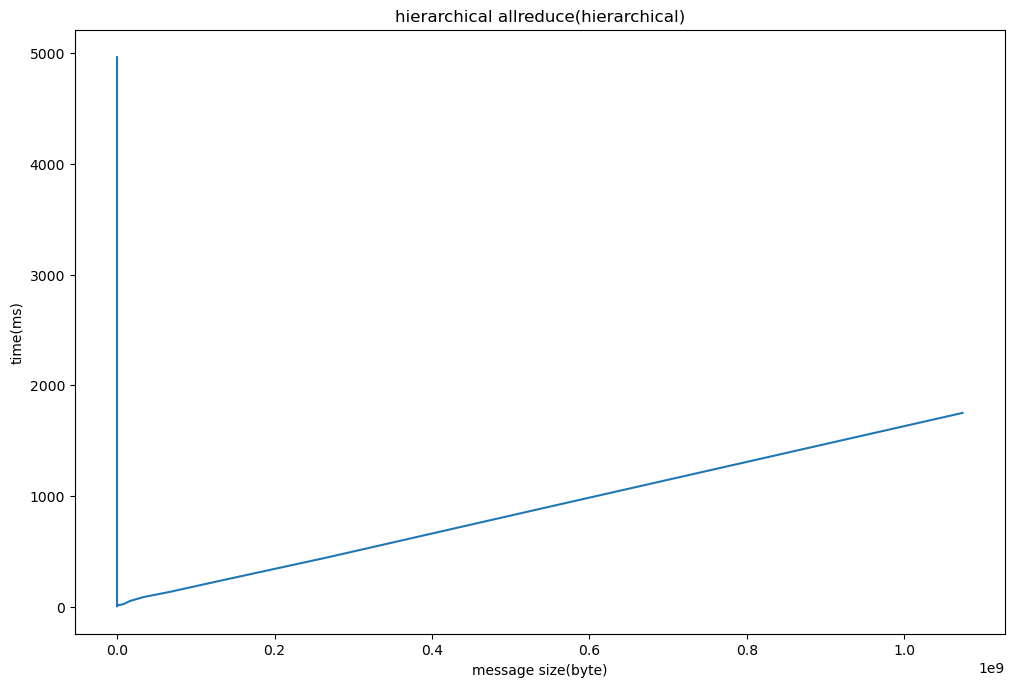

In [48]:

x2, y2 = read_hvd("./data/horovod-results/15gpu/10g-15gpu-h.txt")
plt.plot(x2,y2)
plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
# nccl_reduce+mpi_allreduce+nccl_bcast
plt.title('hierarchical allreduce(hierarchical)')
plt.show()

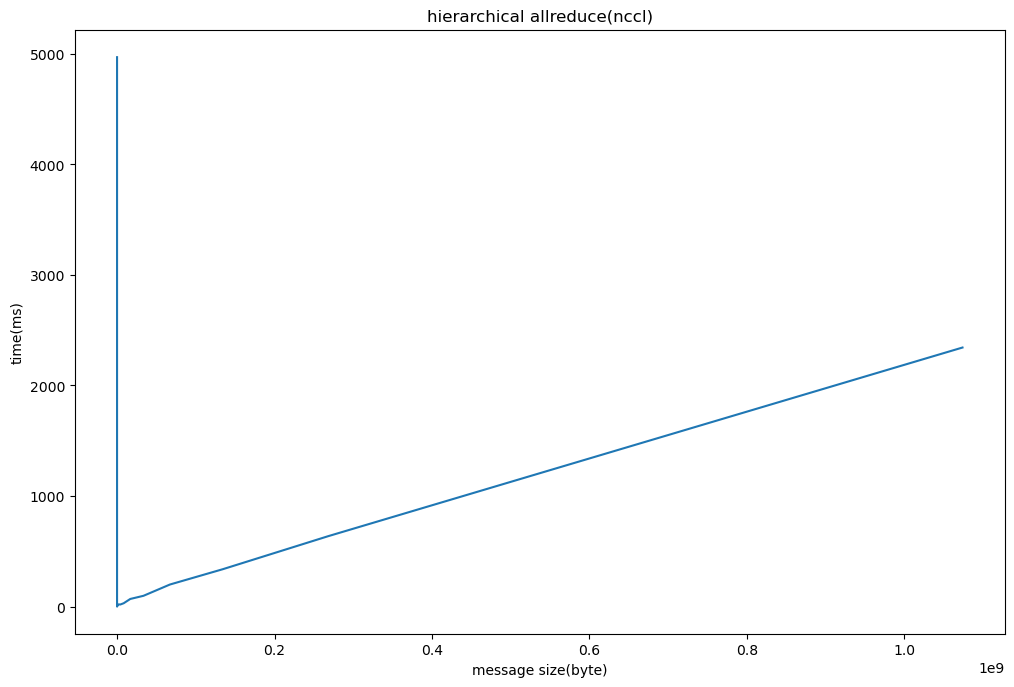

In [53]:
x3, y3 = read_hvd("./data/horovod-results/15gpu/10g-15gpu-nccl.txt")
plt.plot(x3,y3)
plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
# nccl_reduce+nccl_allreduce+nccl_bcast
plt.title('hierarchical allreduce(nccl)')
plt.show()

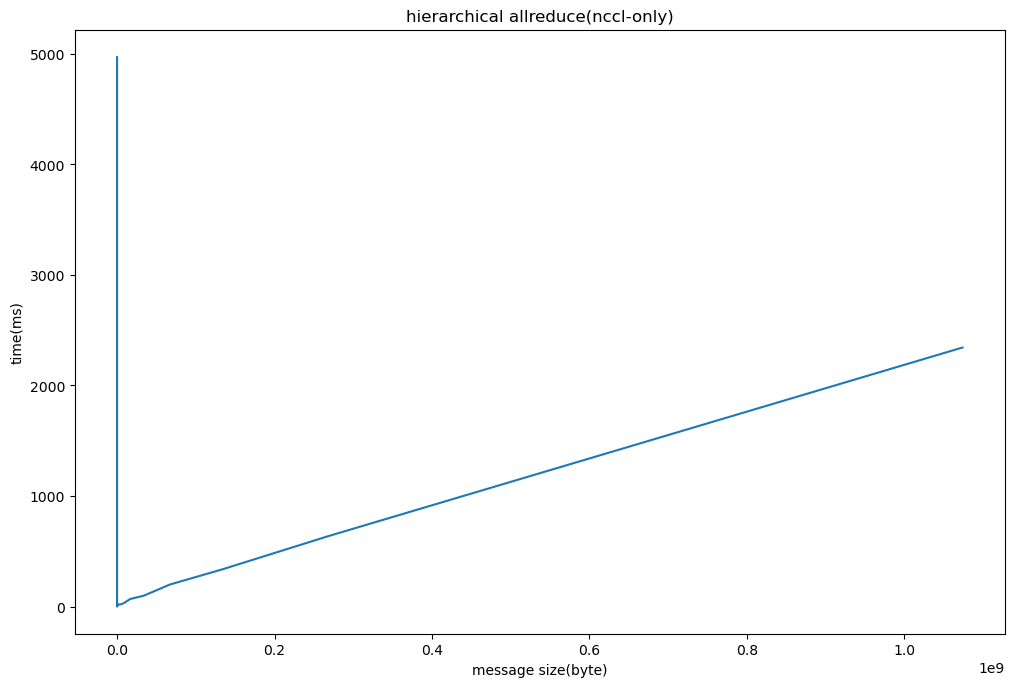

In [55]:
x4, y4 = read_hvd("./data/15gpu/10g-15gpu-nccl-only.txt")
plt.plot(x3,y3)
plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
# nccl_reduce+nccl_allreduce+nccl_bcast
plt.title('hierarchical allreduce(nccl-only)')
plt.show()

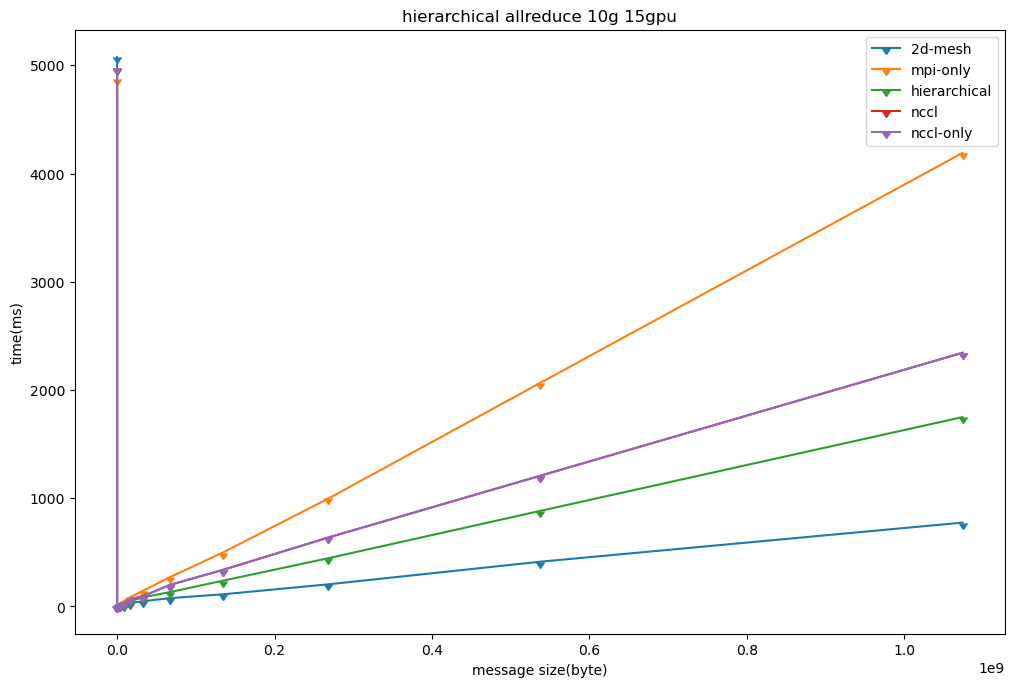

In [57]:
plt.plot(x,y, marker=11, label='2d-mesh')
plt.plot(x1,y1, marker=11, label='mpi-only')
plt.plot(x2,y2, marker=11, label='hierarchical')
plt.plot(x3,y3, marker=11, label='nccl')
plt.plot(x3,y3, marker=11, label='nccl-only')


plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
plt.legend()
# mpi_allreduce
plt.title('hierarchical allreduce 10g 15gpu')
plt.show()

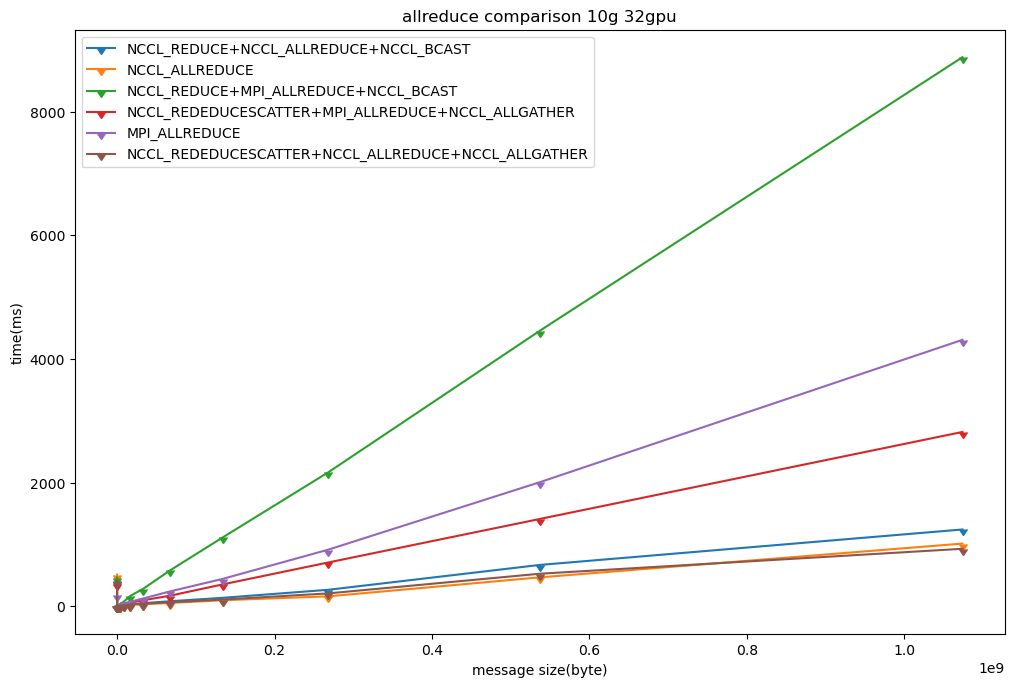

In [26]:
x1, y1 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-nccl.txt")
x2, y2 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-nccl-only.txt")
x3, y3 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-2dmesh-4.txt")
x4, y4 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-h-4.txt")
x5, y5 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-mpi.txt")
x6, y6 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-newnccl.txt")


plt.plot(x1,y1, marker=11, label='NCCL_REDUCE+NCCL_ALLREDUCE+NCCL_BCAST')
plt.plot(x2,y2, marker=11, label='NCCL_ALLREDUCE')
plt.plot(x3,y3, marker=11, label='NCCL_REDUCE+MPI_ALLREDUCE+NCCL_BCAST')
plt.plot(x4,y4, marker=11, label='NCCL_REDEDUCESCATTER+MPI_ALLREDUCE+NCCL_ALLGATHER')
plt.plot(x5,y5, marker=11, label='MPI_ALLREDUCE')
plt.plot(x6,y6, marker=11, label='NCCL_REDEDUCESCATTER+NCCL_ALLREDUCE+NCCL_ALLGATHER')


plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
plt.legend()
# mpi_allreduce
plt.title('allreduce comparison 10g 32gpu')
plt.show()

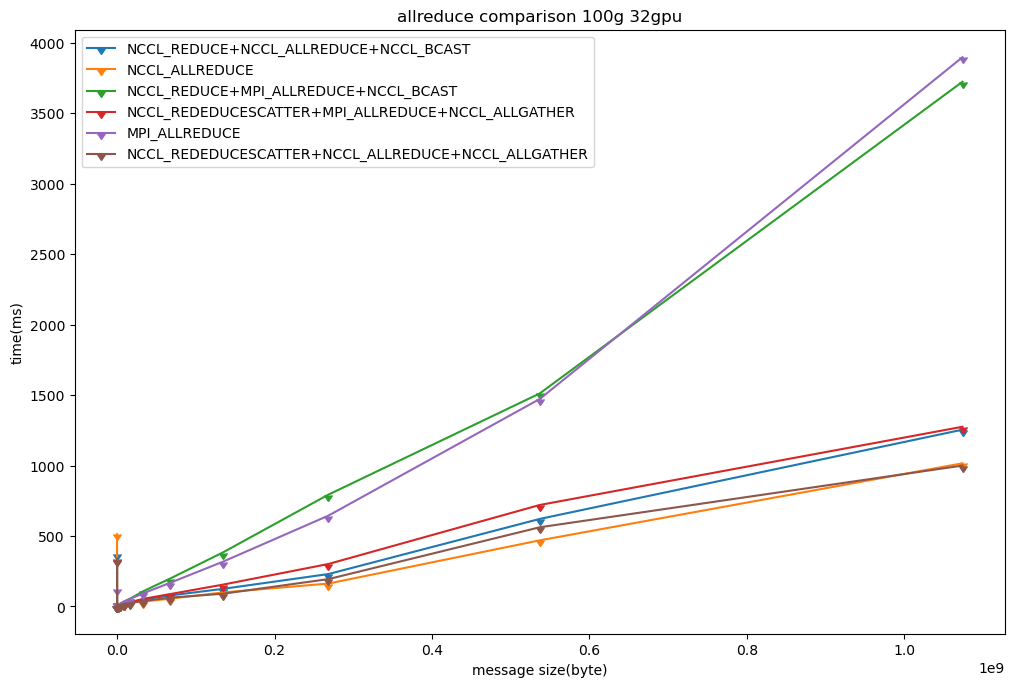

In [14]:
x1, y1 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-nccl.txt")
x2, y2 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-nccl-only.txt")
x3, y3 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-2dmesh-4.txt")
x4, y4 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-h-4.txt")
x5, y5 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-mpi.txt")
x6, y6 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-newnccl.txt")


plt.plot(x1,y1, marker=11, label='NCCL_REDUCE+NCCL_ALLREDUCE+NCCL_BCAST')
plt.plot(x2,y2, marker=11, label='NCCL_ALLREDUCE')
plt.plot(x3,y3, marker=11, label='NCCL_REDUCE+MPI_ALLREDUCE+NCCL_BCAST')
plt.plot(x4,y4, marker=11, label='NCCL_REDEDUCESCATTER+MPI_ALLREDUCE+NCCL_ALLGATHER')
plt.plot(x5,y5, marker=11, label='MPI_ALLREDUCE')
plt.plot(x6,y6, marker=11, label='NCCL_REDEDUCESCATTER+NCCL_ALLREDUCE+NCCL_ALLGATHER')


plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
plt.legend()
# mpi_allreduce
plt.title('allreduce comparison 100g 32gpu')
plt.show()

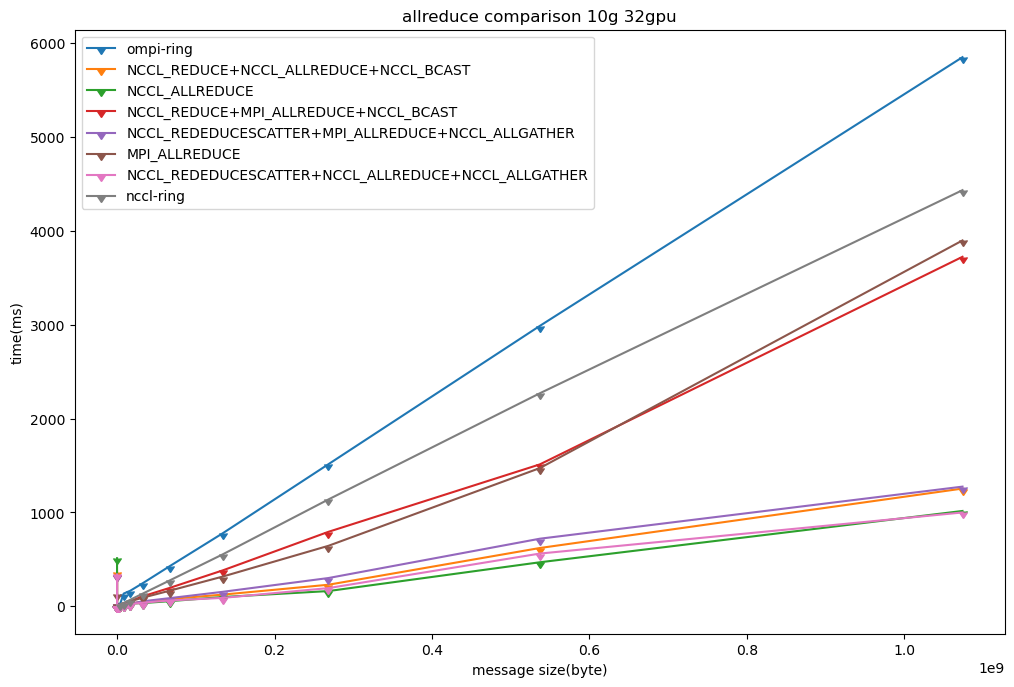

In [20]:
def read_algo_with_head(filename,skipnum=3):
    x = []
    y = []

    with open(filename) as f:
        for _ in range(skipnum):
            next(f)
    
        for line in f:
            num = line.split()
            x.append(num[0])
            y.append(num[1])

    x = np.array(x)
    y = np.array(y)

    return x.astype('float'), y.astype('float')

x, y = read_algo_with_head('data/ompi-32gpu-results/32gpus/10g/algo4-stepexp2.txt')

def read_algo_skip_head(filename,skip_num=215):
    x = []
    y = []

    with open(filename) as f:
        for _ in range(int(skip_num)):
            next(f)
    
        for line in f:
            if not line.startswith('#'):
                num = line.split()
                x.append(num[0])
                y.append(num[4])

    x = np.array(x)
    y = np.array(y)

    return x.astype('float'), y.astype('float')

x7, y7 = read_algo_skip_head('data/nccl-results/nccl-32gpus/10g-stepexp2-2.txt', 707)



# print(x,y)
x = x * 4
y = y * 10e-3


x = x[:-1]
y = y[:-1]

x7 = x7 * 4
y7 = y7 * 10e-3


plt.plot(x,y, marker=11, label='ompi-ring')
plt.plot(x1,y1, marker=11, label='NCCL_REDUCE+NCCL_ALLREDUCE+NCCL_BCAST')
plt.plot(x2,y2, marker=11, label='NCCL_ALLREDUCE')
plt.plot(x3,y3, marker=11, label='NCCL_REDUCE+MPI_ALLREDUCE+NCCL_BCAST')
plt.plot(x4,y4, marker=11, label='NCCL_REDEDUCESCATTER+MPI_ALLREDUCE+NCCL_ALLGATHER')
plt.plot(x5,y5, marker=11, label='MPI_ALLREDUCE')
plt.plot(x6,y6, marker=11, label='NCCL_REDEDUCESCATTER+NCCL_ALLREDUCE+NCCL_ALLGATHER')
plt.plot(x7,y7, marker=11, label='nccl-ring')


plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
plt.legend()
# mpi_allreduce
plt.title('allreduce comparison 10g 32gpu')
plt.show()



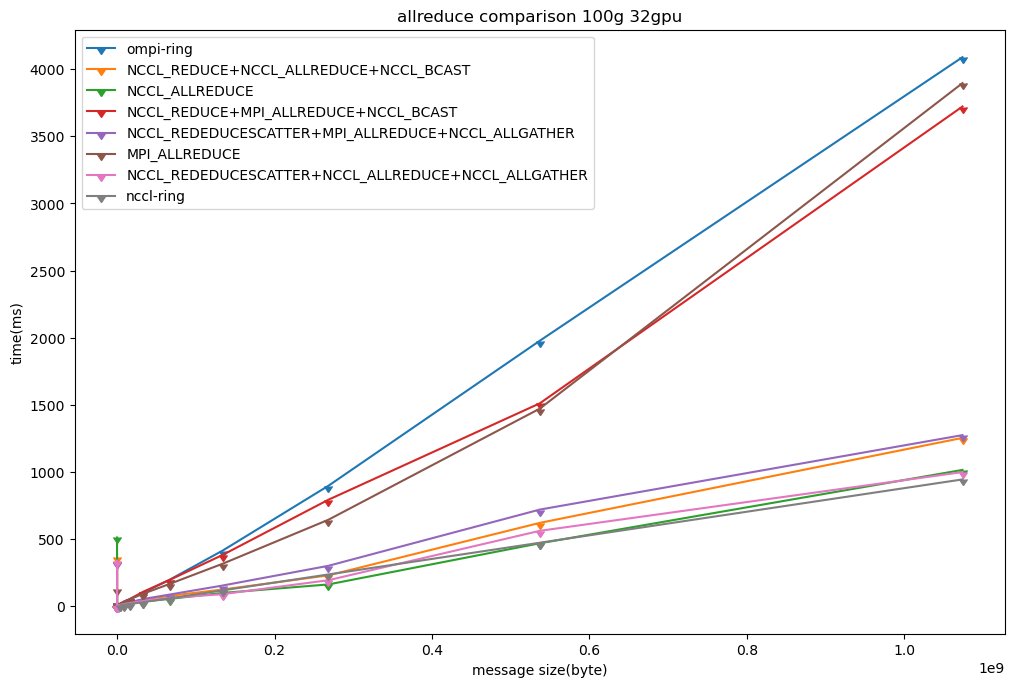

In [19]:
x, y = read_algo_with_head('data/ompi-32gpu-results/32gpus/100g/algo4-stepexp2.txt')
x1, y1 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-nccl.txt")
x2, y2 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-nccl-only.txt")
x3, y3 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-2dmesh-4.txt")
x4, y4 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-h-4.txt")
x5, y5 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-mpi.txt")
x6, y6 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-newnccl.txt")
x7, y7 = read_algo_skip_head('data/nccl-results/nccl-32gpus/100g-stepexp2.txt', 723)

x = x * 4
y = y * 10e-3


x = x[:-1]
y = y[:-1]

x7 = x7 * 4
y7 = y7 * 10e-3



plt.plot(x,y, marker=11, label='ompi-ring')
plt.plot(x1,y1, marker=11, label='NCCL_REDUCE+NCCL_ALLREDUCE+NCCL_BCAST')
plt.plot(x2,y2, marker=11, label='NCCL_ALLREDUCE')
plt.plot(x3,y3, marker=11, label='NCCL_REDUCE+MPI_ALLREDUCE+NCCL_BCAST')
plt.plot(x4,y4, marker=11, label='NCCL_REDEDUCESCATTER+MPI_ALLREDUCE+NCCL_ALLGATHER')
plt.plot(x5,y5, marker=11, label='MPI_ALLREDUCE')
plt.plot(x6,y6, marker=11, label='NCCL_REDEDUCESCATTER+NCCL_ALLREDUCE+NCCL_ALLGATHER')
plt.plot(x7,y7, marker=11, label='nccl-ring')



plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
plt.legend()
# mpi_allreduce
plt.title('allreduce comparison 100g 32gpu')
plt.show()

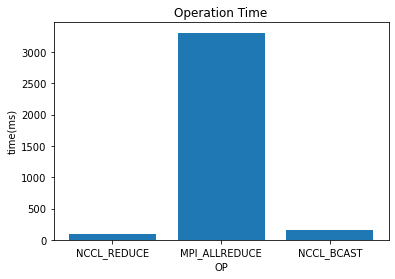

In [2]:
ops = ['NCCL_REDUCE', 'MPI_ALLREDUCE', 'NCCL_BCAST']
t = [88.690, 3308.915, 153.625]

plt.bar(ops, t)
plt.title('Operation Time')
plt.xlabel('OP')
plt.ylabel('time(ms)')
plt.show()

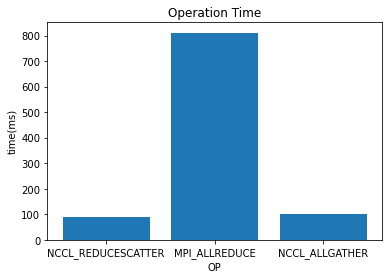

In [3]:
ops = ['NCCL_REDUCESCATTER', 'MPI_ALLREDUCE', 'NCCL_ALLGATHER']
t = [90.324, 810.733, 101.798]

plt.bar(ops, t)
plt.title('Operation Time')
plt.xlabel('OP')
plt.ylabel('time(ms)')
plt.show()

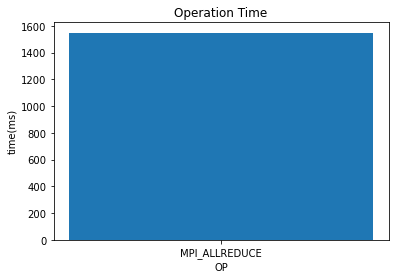

In [4]:
ops = ['MPI_ALLREDUCE']
t = [1547.685]

plt.bar(ops, t)
plt.title('Operation Time')
plt.xlabel('OP')
plt.ylabel('time(ms)')
plt.show()

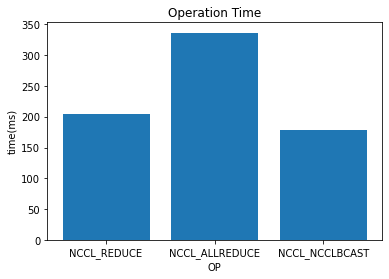

In [6]:
ops = ['NCCL_REDUCE', 'NCCL_ALLREDUCE', 'NCCL_NCCLBCAST']
t = [204.035, 336.320, 178.525]

plt.bar(ops, t)
plt.title('Operation Time')
plt.xlabel('OP')
plt.ylabel('time(ms)')
plt.show()

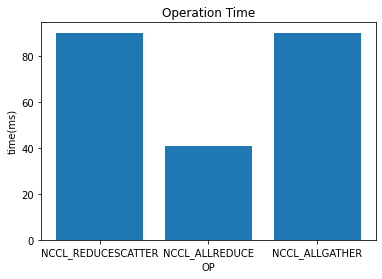

In [7]:
ops = ['NCCL_REDUCESCATTER', 'NCCL_ALLREDUCE', 'NCCL_ALLGATHER']
t = [90.053, 40.737, 89.783]

plt.bar(ops, t)
plt.title('Operation Time')
plt.xlabel('OP')
plt.ylabel('time(ms)')
plt.show()